# Problem Statement
# Air Passenger
Perform the following tasks: 
    
* Visualize the Air Passenger time series and check for any trend, seasonality or random patterns.
* Stantionarize the series using decomposition or differencing techniques
*  Plot ACF/PACF  and find (p,q,d) parameters
* Build the Model 
* Make Predictions using Final Model

In [1]:
import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid',color_codes= True)
matplotlib.rc('xtick',labelsize=40)
matplotlib.rc('ytick',labelsize=40)
import datetime  
from datetime import datetime as dt

In [2]:
data =pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.shape

(144, 2)

In [4]:
#lets rename passenger column name
data.rename(columns={'#Passengers':'Passengers'}, inplace =True)
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# lets check the info of air passenger 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# lets convert the month into date for more accurate  time plot
data["Month"]= pd.to_datetime(data["Month"])

In [7]:
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


$NOTE:$ date has been taken fixed 1st by default for ploting the  time plot and check any  zero mean, most freqent variance ,noise happening in the graph.

# Visualize Air Passenger Data and check for any trend, seasonality and resdual:

Text(0.5, 1.0, 'Passengers Travels Yearly')

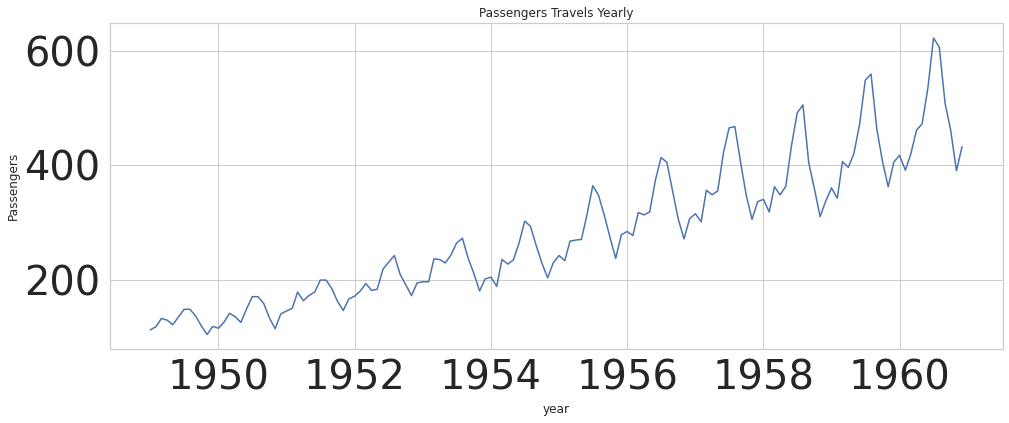

In [8]:
plt.figure(figsize=(16,6))
plt.plot(data['Month'],data['Passengers'])
plt.xlabel("year")
plt.ylabel("Passengers")
plt.title("Passengers Travels Yearly")

$Interpretation:$ 
There is a clear increasing trend from 1950 to 1960
* we can also see that there is a consistent increase from 1958 to 1960 hence there can be  strong seasonal patterns.

# Visualize in the form of Stack line Charts

In [9]:
# lets split the month column in year and month properly for better understanding
data['Year']=data['Month'].dt.year
data['month'] =data['Month'].dt.strftime('%b')
data.head()

,Month,Passengers,Year,month
0,1949-01-01,112,1949,Jan
1,1949-02-01,118,1949,Feb
2,1949-03-01,132,1949,Mar
3,1949-04-01,129,1949,Apr
4,1949-05-01,121,1949,May


In [10]:
data['month'].unique

<bound method Series.unique of 0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: month, Length: 144, dtype: object>

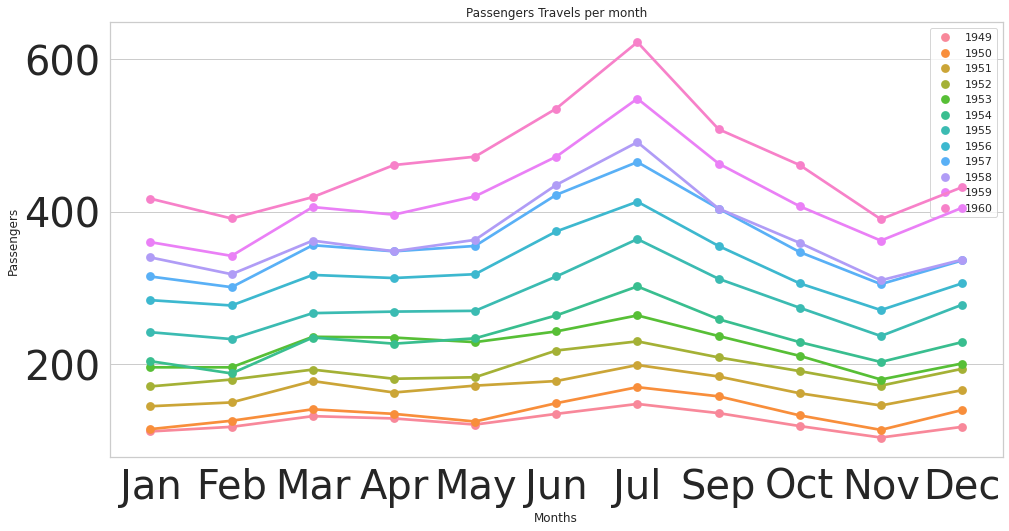

In [11]:
# lets visualize:
plt.figure(figsize=(16,8))
sns.pointplot(x='month', y="Passengers",hue='Year',data=data, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.title("Passengers Travels per month")
plt.legend(loc="upper right")

$Intrpretation:$
* There is a large jump in the month  july around 600 above paseengers travels in year 1959 to 1960.
* However in the same year range there is a drop in the passenger travel in the month of November.
* There is a colinearity in year 1958,1956.

# Visualize the Box Plot:

Text(0.5, 1.0, 'Passengers Travels per month')

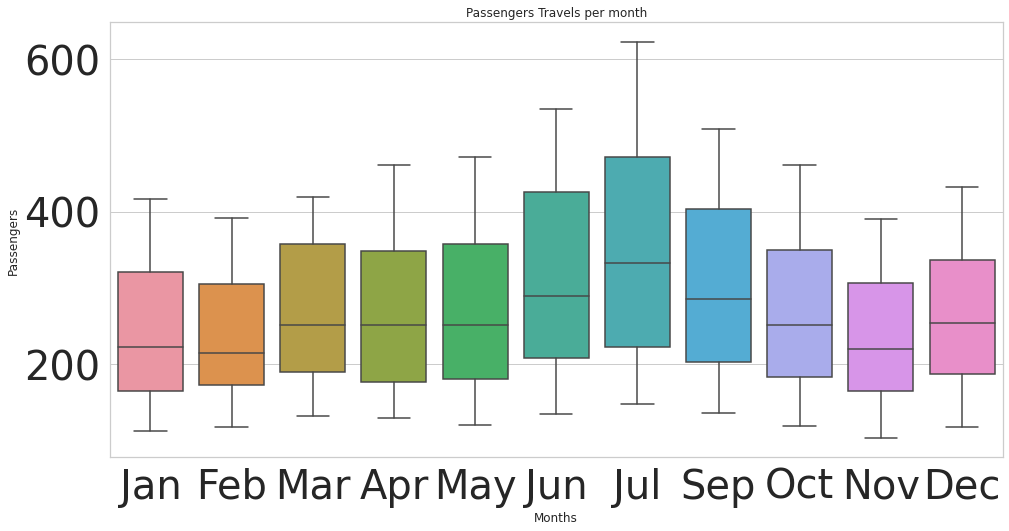

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(x='month', y="Passengers",data=data, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec']
)
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.title("Passengers Travels per month")


$Interpretation:$ there are fluctuations in the passenger number to travel 
we can see that in july  has  a long whiskers whch depicts that there are large number of passengers travels in the month of july. 

$Lag Plot$:Lets check the above prediction is made accurate or not by checking the dataset is choosen randomly or not by using Lag Plot

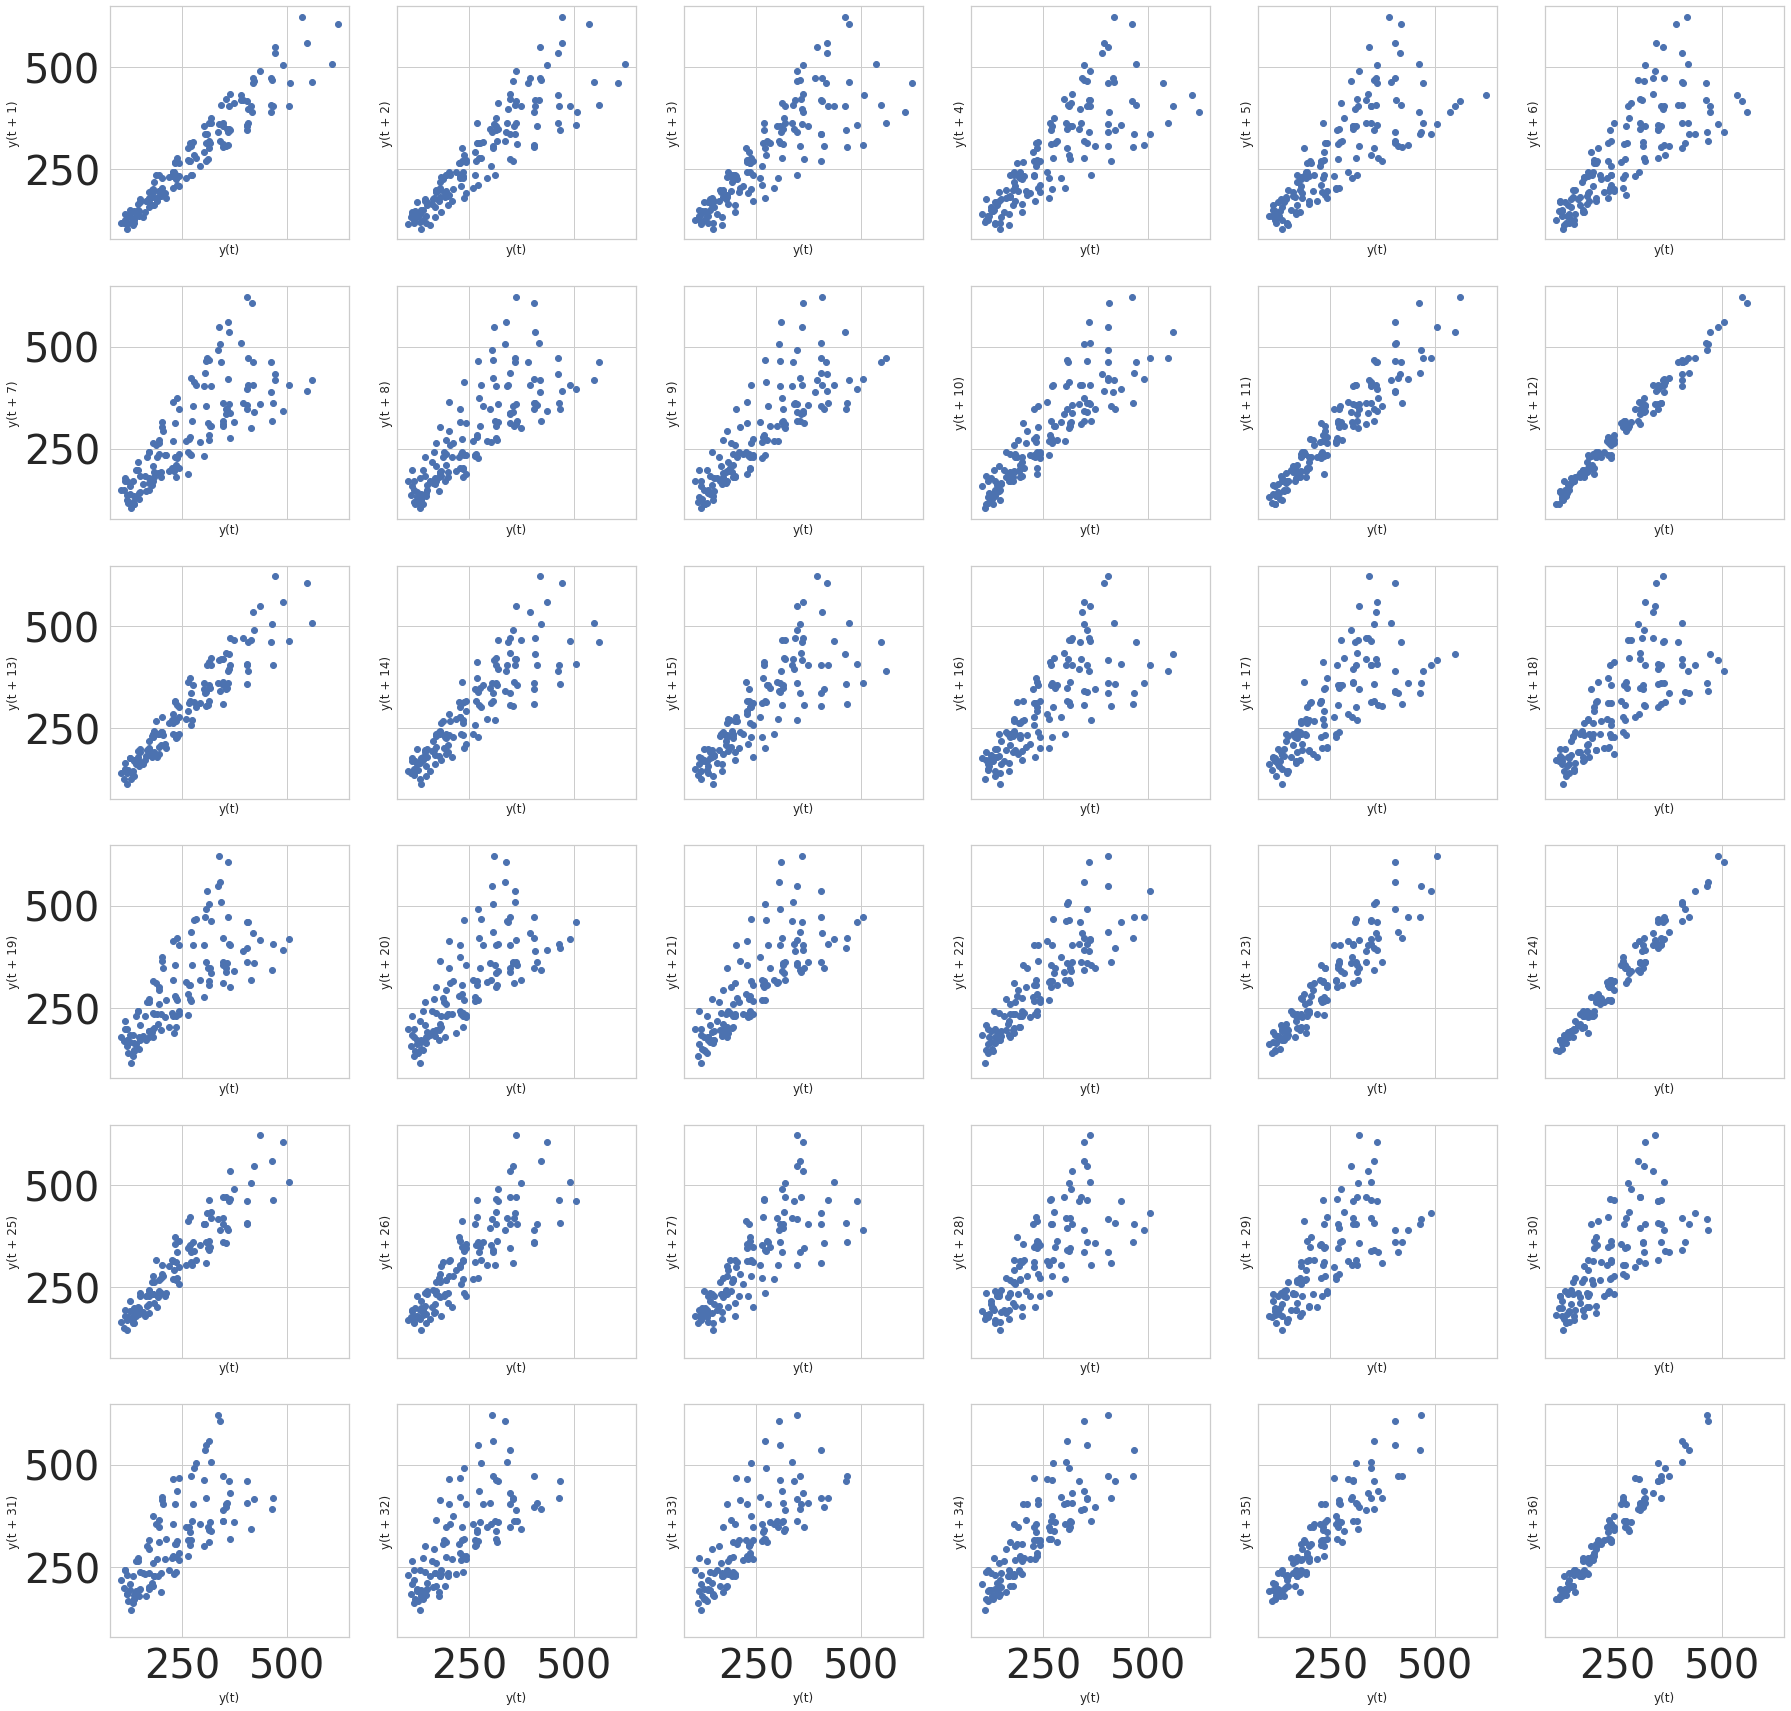

In [13]:
from pandas.plotting import lag_plot
plot_lags =30
rows=int( plot_lags/5)
cols = int(plot_lags/5)
fig,axes =plt.subplots(rows,cols,sharex=True,sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count=1
for i in range(rows):
    for j in range(cols):
        lag_plot(data['Passengers'], lag =count, ax=axes[i,j])
        count+=1

$Interpretation:$ we can see that there is constant patterns in the graph hence data is not random here.

# Lets check colinearity between the datasets by using Auto Correlation and Partial Auto Correlation fuction:


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

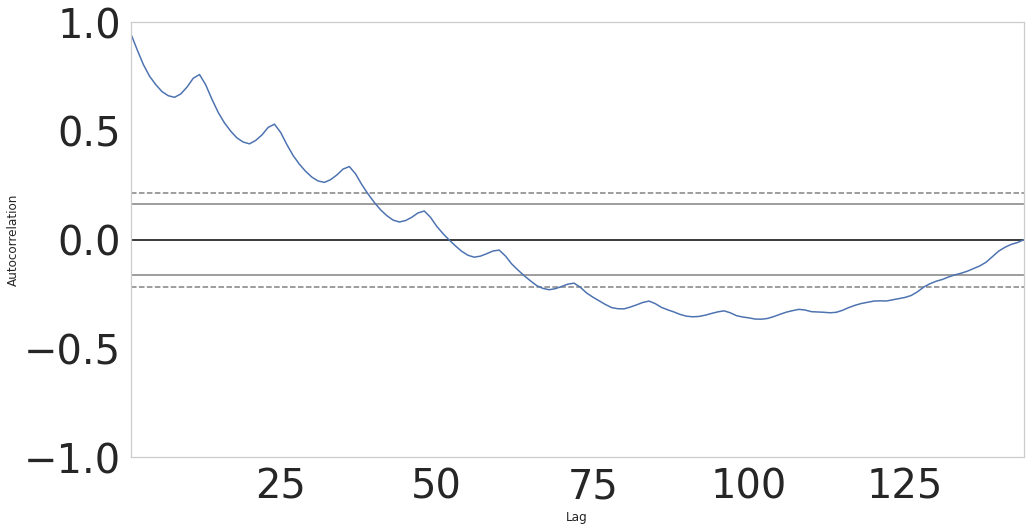

In [14]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16,8))
autocorrelation_plot(data['Passengers'])

$Interpretation:$ there is damp/downward trend which shows a ngative autocorrelation.

# Decomposition Time Series Data.

Lets create a data frame called a decompose and indulge month and passengers data into it for finding any trends, seasonality or residuals.

In [15]:
decompose =data[['Month','Passengers']]
decompose.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
#Lets make the index with dates: 

In [17]:
decompose.index=data['Month']
decompose.head()


,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [18]:
decompose =decompose[['Passengers']]
decompose.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Importing Decomposition Model and Ploting the graphs on trends, seasonality and residuals:

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [20]:
decomposition =seasonal_decompose(decompose)
trend =decomposition.trend
seasonal =decomposition.seasonal
residual =decomposition.resid

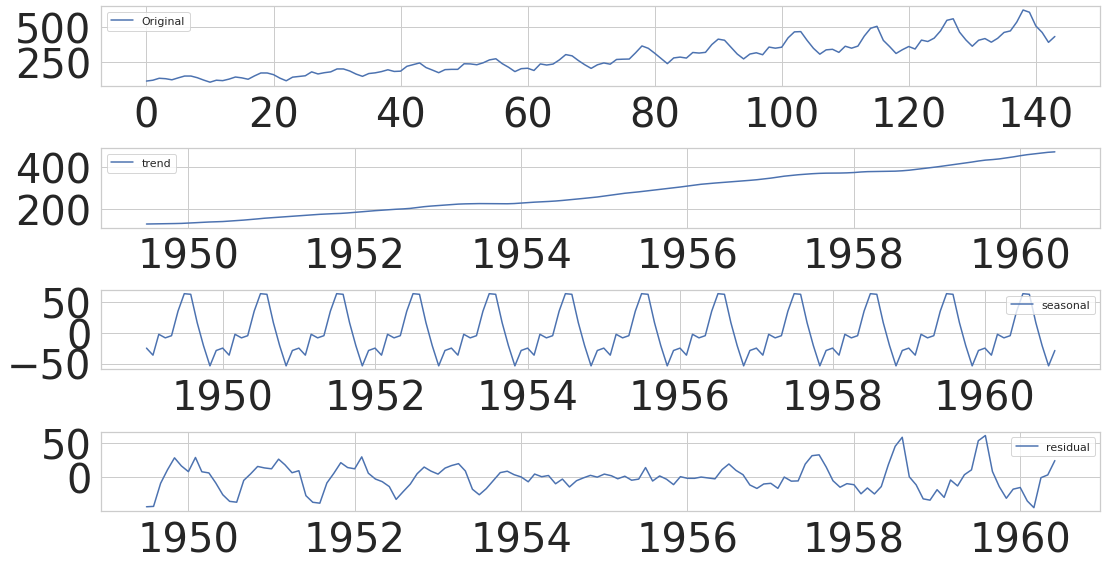

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(data['Passengers'],label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="seasonal")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label="residual")
plt.legend(loc="best")
plt.tight_layout()

$Interpretation:$
* there is a rise in trend graph (linearly) from 1950 to 1960.

# Standarize the series using differecing techniques:

In [22]:
import math 
from math import pow, sqrt
from sklearn.metrics import mean_squared_error

In [23]:
data.head()

,Month,Passengers,Year,month
0,1949-01-01,112,1949,Jan
1,1949-02-01,118,1949,Feb
2,1949-03-01,132,1949,Mar
3,1949-04-01,129,1949,Apr
4,1949-05-01,121,1949,May


In [24]:
# lets split the data set
data.index=data["Month"]
data=data[['Passengers']]
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:

x_train =data[data.index <datetime.datetime(1960,1,1,0,0,0)]
x_test= data[data.index >= datetime.datetime(1960,1,1,0,0,0)]

In [26]:
print("The shape of x train set", x_train.shape)
print("THe Shape of the x test",x_test.shape)

The shape of x train set (132, 1)
THe Shape of the x test (12, 1)


In [27]:
# lets check the p value by using  Augmented dickey-fuller(ADF) Test:
from statsmodels.tsa.stattools import adfuller

In [28]:
# define the stationary test :
def stationary_test(data):
    dftest =adfuller(data.Passengers, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','P value','#Lag Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Values(%s)'%key]=value
    print(dfoutput)
    
    plt.figure(figsize=(16,7))
    plt.plot(data.index,data.Passengers)
    plt.show()

Test Statistic                   0.888027
P value                          0.992932
#Lag Used                       13.000000
Number of Observations Used    118.000000
Critical Values(1%)             -3.487022
Critical Values(5%)             -2.886363
Critical Values(10%)            -2.580009
dtype: float64


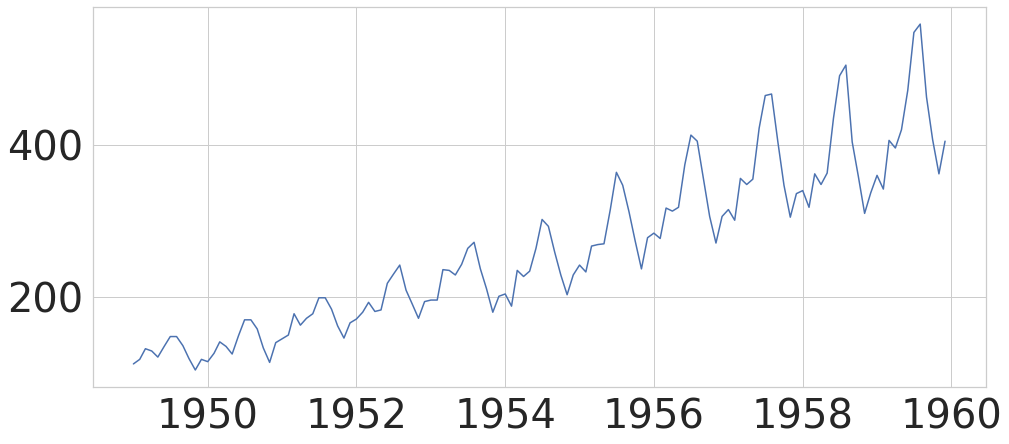

In [29]:
stationary_test(x_train)

$Interpretation:$  the p value here is 0.99 hence time series data is not stationary.

In [30]:
# lets convert into logarithm data:
log_train =x_train
log_train =log_train["Passengers"].apply(lambda x: math.log(x+1))
log_train

Month
1949-01-01    4.727388
1949-02-01    4.779123
1949-03-01    4.890349
1949-04-01    4.867534
1949-05-01    4.804021
                ...   
1959-08-01    6.327937
1959-09-01    6.139885
1959-10-01    6.011267
1959-11-01    5.894403
1959-12-01    6.006353
Name: Passengers, Length: 132, dtype: float64

In [31]:
# lets put in dataframe
log_train = pd.DataFrame(log_train)
log_train

,Passengers
Month,
1949-01-01,4.727388
1949-02-01,4.779123
1949-03-01,4.890349
1949-04-01,4.867534
1949-05-01,4.804021
...,...
1959-08-01,6.327937
1959-09-01,6.139885
1959-10-01,6.011267


Test Statistic                  -1.307055
P value                          0.625938
#Lag Used                       13.000000
Number of Observations Used    118.000000
Critical Values(1%)             -3.487022
Critical Values(5%)             -2.886363
Critical Values(10%)            -2.580009
dtype: float64


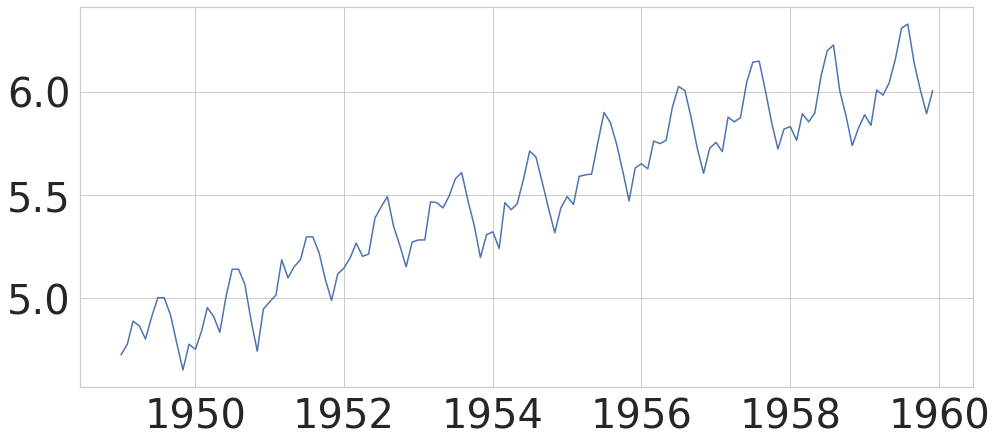

In [32]:
# lets check again the p value and the graph using dickey fuller 
stationary_test(log_train)

$Interperation :$ Here we can see the p value drops from 0.99 to 0.62, hence data is  not stationary 
* lets use the technique differencing

In [33]:
first_diff =log_train['Passengers']-log_train['Passengers'].shift(1)
first_diff =first_diff.fillna(0)
first_diff =pd.DataFrame(first_diff)


Test Statistic                  -3.090415
P value                          0.027271
#Lag Used                       13.000000
Number of Observations Used    118.000000
Critical Values(1%)             -3.487022
Critical Values(5%)             -2.886363
Critical Values(10%)            -2.580009
dtype: float64


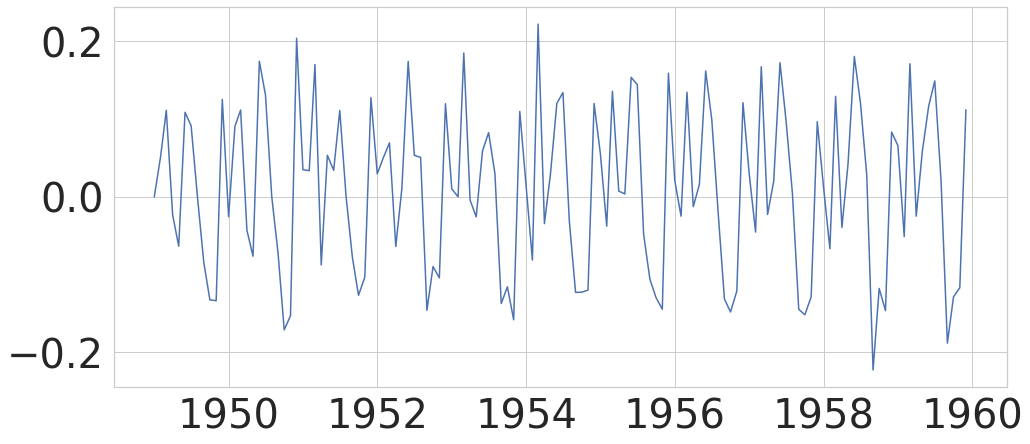

In [34]:
stationary_test(first_diff)

$Interpretation: $ the P value is less than 0.05  which is 0.027 hence we achieved stationary.

Test Statistic                  -3.144552
P value                          0.023427
#Lag Used                       13.000000
Number of Observations Used    118.000000
Critical Values(1%)             -3.487022
Critical Values(5%)             -2.886363
Critical Values(10%)            -2.580009
dtype: float64


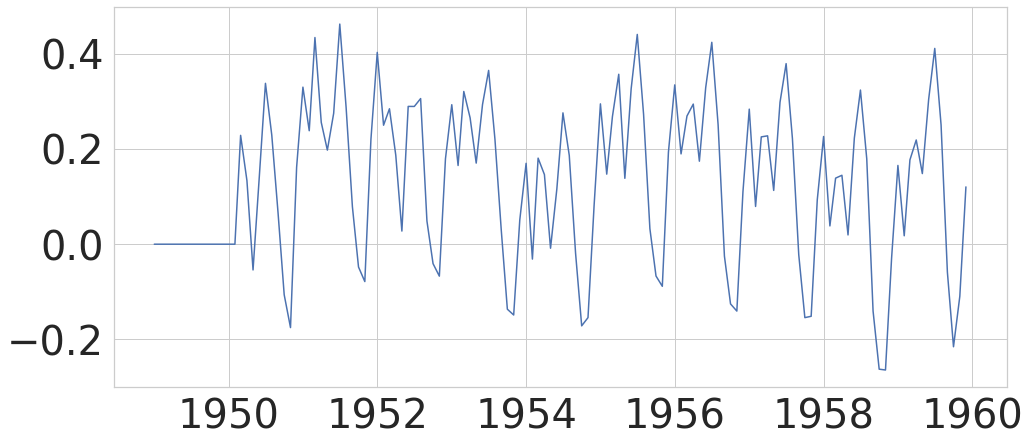

In [35]:
# check for seasonal differentiating for stationary check 
seasonal_diff =log_train['Passengers']-log_train['Passengers'].shift(14)
seasonal_diff= seasonal_diff.fillna(0)
seasonal_diff =pd.DataFrame(seasonal_diff)
stationary_test(seasonal_diff)

$Interretation:$ The p-value is less than 0.05, and we can clearly see that the differencing has led to the stationarity of data.

# ARIMA Model:

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

Text(0.5, 1.0, ' Partial Autocorrelation Fuction')

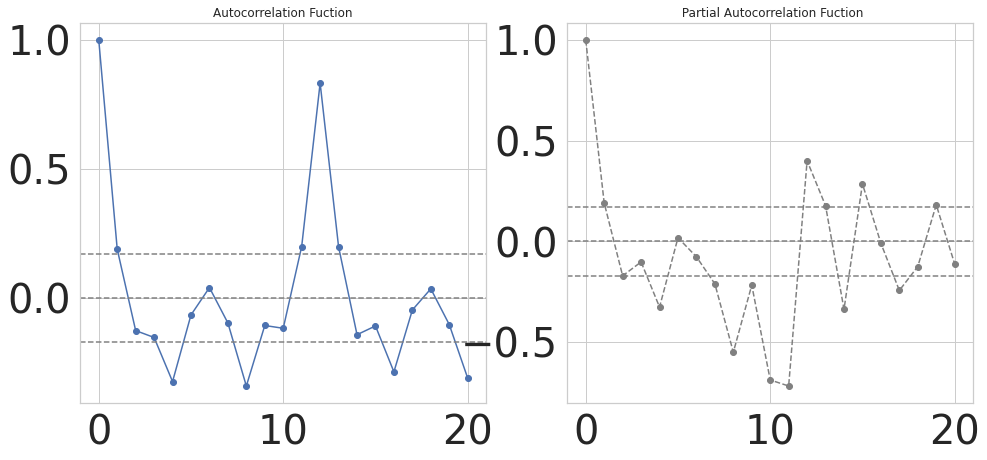

In [37]:
# Lets find ACF and PACF plots for p,q,d values:
#z_score =1.96 as we need confidence level =95%
lag_acf =acf(first_diff, nlags= 20)
lag_pacf =pacf(first_diff,nlags=20)
plt.figure(figsize=(16,7))
# for ACF:
plt.subplot(121)
plt.plot(lag_acf,marker="o")
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y =1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Fuction')

# For PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o",linestyle='--',color='gray')
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y =1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title(' Partial Autocorrelation Fuction')

$Interpretation:$  p value is around 1 and q= 1 as well 

In [52]:
model =ARIMA(log_train, order=(2,2,1),freq ='MS')
result_ARIMA= model.fit()

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
print(result_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 109.160
Date:                Sat, 16 Sep 2023   AIC                           -210.321
Time:                        20:15:12   BIC                           -198.851
Sample:                    01-01-1949   HQIC                          -205.660
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2295      0.109      2.097      0.036       0.015       0.444
ar.L2         -0.1662      0.111     -1.495      0.135      -0.384       0.052
ma.L1         -0.9999     26.053     -0.038      0.9

79.765307543679


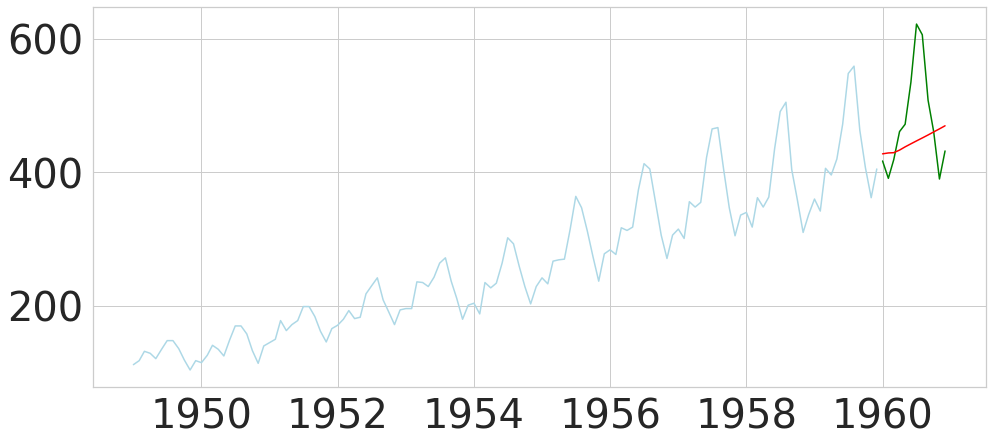

In [54]:
plt.figure(figsize=(16,7))
plt.plot(x_train.index,x_train.values, color="lightblue")
plt.plot(x_test.index,x_test.values,color='green')

pred= pd.DataFrame(result_ARIMA.forecast(len(x_test)))
pred.columns =["Passenger_Travel"]
pred.index= x_test.index

pred["Passenger_Travel"] =pred["Passenger_Travel"].apply(lambda x:math.exp(x)-1)

measure= math.sqrt(mean_squared_error(x_test.values, pred.values))
print(measure)
plt.plot(pred.index,pred.fillna(0).values,color='red')
plt.show()


In [58]:
pred= pd.DataFrame(result_ARIMA.forecast(len(x_test)))
pred.columns =["Passenger_Travel"]
pred.index= x_test.index

In [59]:
pred

,Passenger_Travel
Month,
1960-01-01,6.060723
1960-02-01,6.063842
1960-03-01,6.064766
1960-04-01,6.073707
1960-05-01,6.084852
1960-06-01,6.095171
1960-07-01,6.104934
1960-08-01,6.114706
1960-09-01,6.124573


In [56]:
pred["Passenger_Travel"] =pred["Passenger_Travel"].apply(lambda x:math.exp(x)-1)

In [57]:
pred

,Passenger_Travel
Month,
1960-01-01,5.513025e+185
1960-02-01,2.103067e+186
1960-03-01,3.130800e+186
1960-04-01,1.494207e+188
1960-05-01,1.941982e+190
1960-06-01,1.847002e+192
1960-07-01,1.435351e+194
1960-08-01,1.169233e+196
1960-09-01,1.038476e+198


In [55]:
measure= math.sqrt(mean_squared_error(x_test.values, pred.values))
print(measure)

79.765307543679


In [60]:
!pip install pmdarima --quiet
import pmdarima as pm

DEPRECATION: beakerx-base 2.0.1 has a non-standard dependency specifier ipywidgets<8pandas,>=7.5.1. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of beakerx-base or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [63]:
ARIMA_model =pm.auto_arima(data['Passengers'],
                          start_p=1,start_q=1,test='adf', max_p=3,m=1, d= None,
                          seasonal =False,
                          trace=False,
                          error_action= 'warn',
                          suppress_warnings=True,stepwise= True)

                      

$NOTE:$
* test='adf', # use adftest to find optimal 'd'
*  max_p=3, max_q=3, # maximum p and q
*  m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
*  d=None,# let model determine 'd'
* seasonal=False, # No Seasonality for standard ARIMA
*  trace=False, #logs 
*  error_action='warn', #shows errors ('ignore' silences these)
                 

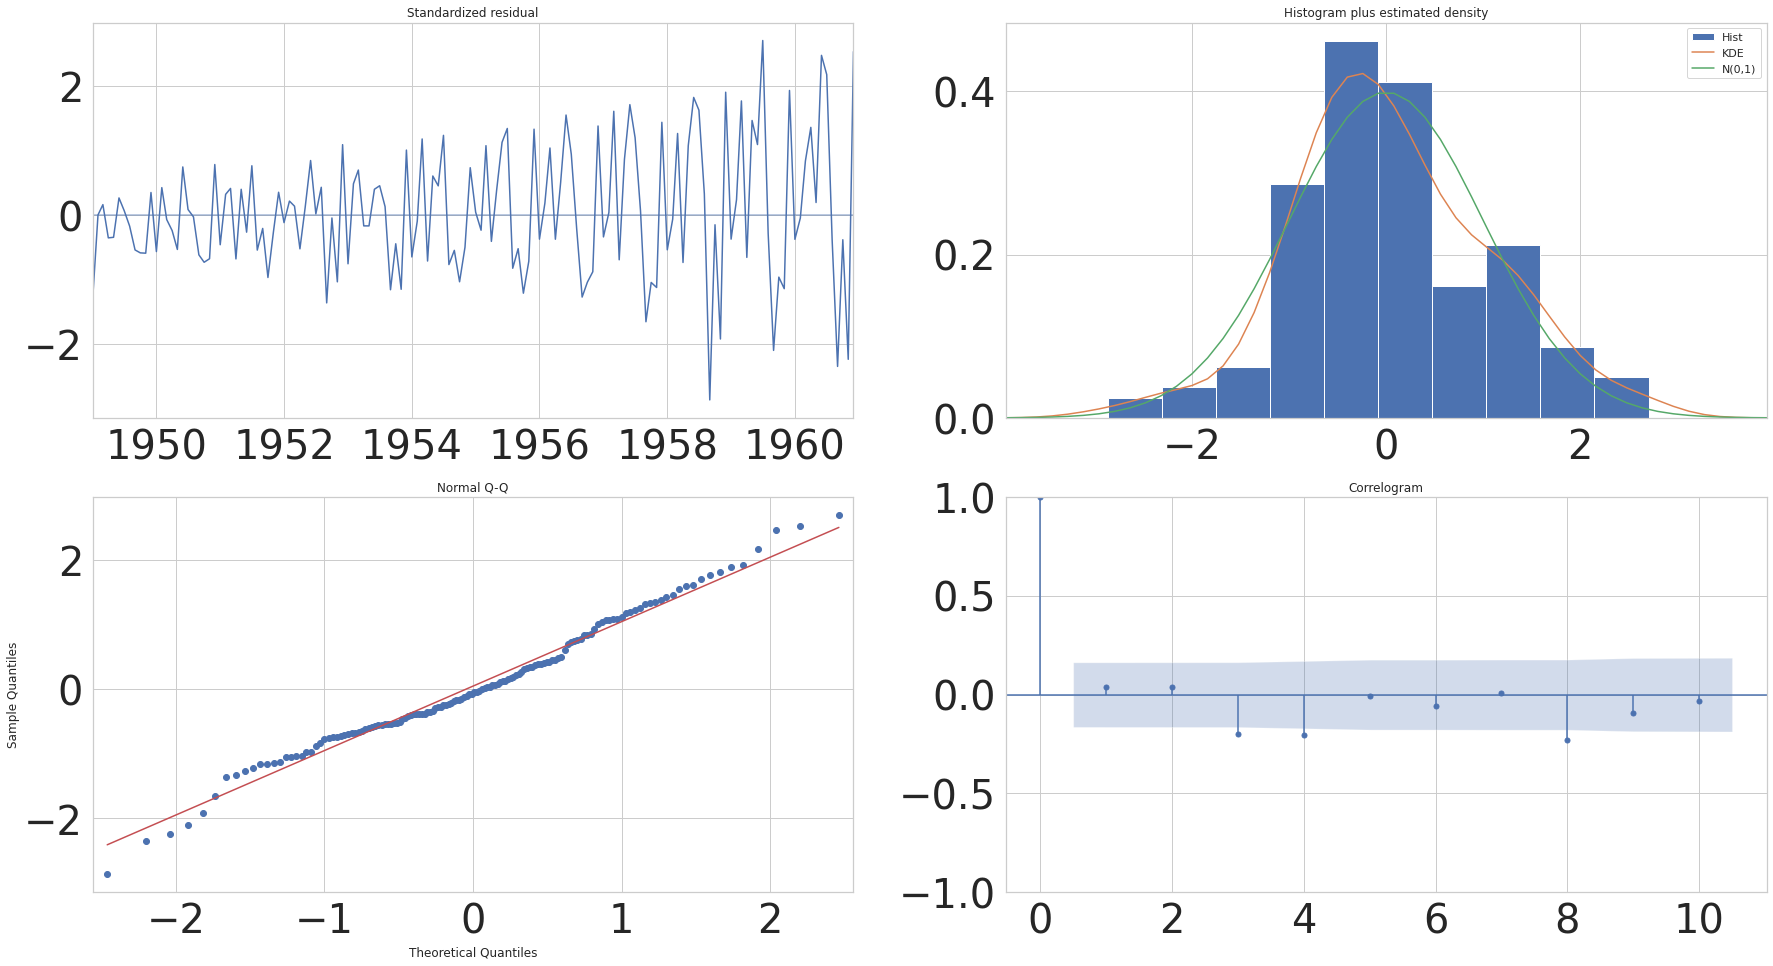

In [70]:
# lets plot standarized residual ,correlogram,Normal q-q, histogram
ARIMA_model.plot_diagnostics(figsize=(30,16))
plt.show()

# Model Diagnostics
Four plots result from the plot_diagnostics function. The Standardized residual, Histogram plus KDE estimate, Normal q-q, and the correlogram.

We can interpret the model as a good fit based on the following conditions.

# Standardized residual

There are no obvious patterns in the residuals, with values having a mean of zero and having a uniform variance.

# Histogram plus KDE estimate

The KDE curve should be very similar to the normal distribution (labeled as N(0,1) in the plot)

# Normal Q-Q

Most of the data points should lie on the straight line

# Correlogram (ACF plot)

95% of correlations for lag greater than zero should not be significant. The grey area is the confidence band, and if values fall outside of this then they are statistically significant. In our case, there are a few values outside of this area, and therefore we may need to add more predictors to make the model more accurate

# SARIMA Model
Now let’s try the same strategy as we did above, except let’s use a SARIMA model so that we can account for seasonality. 

In [74]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(data["Passengers"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


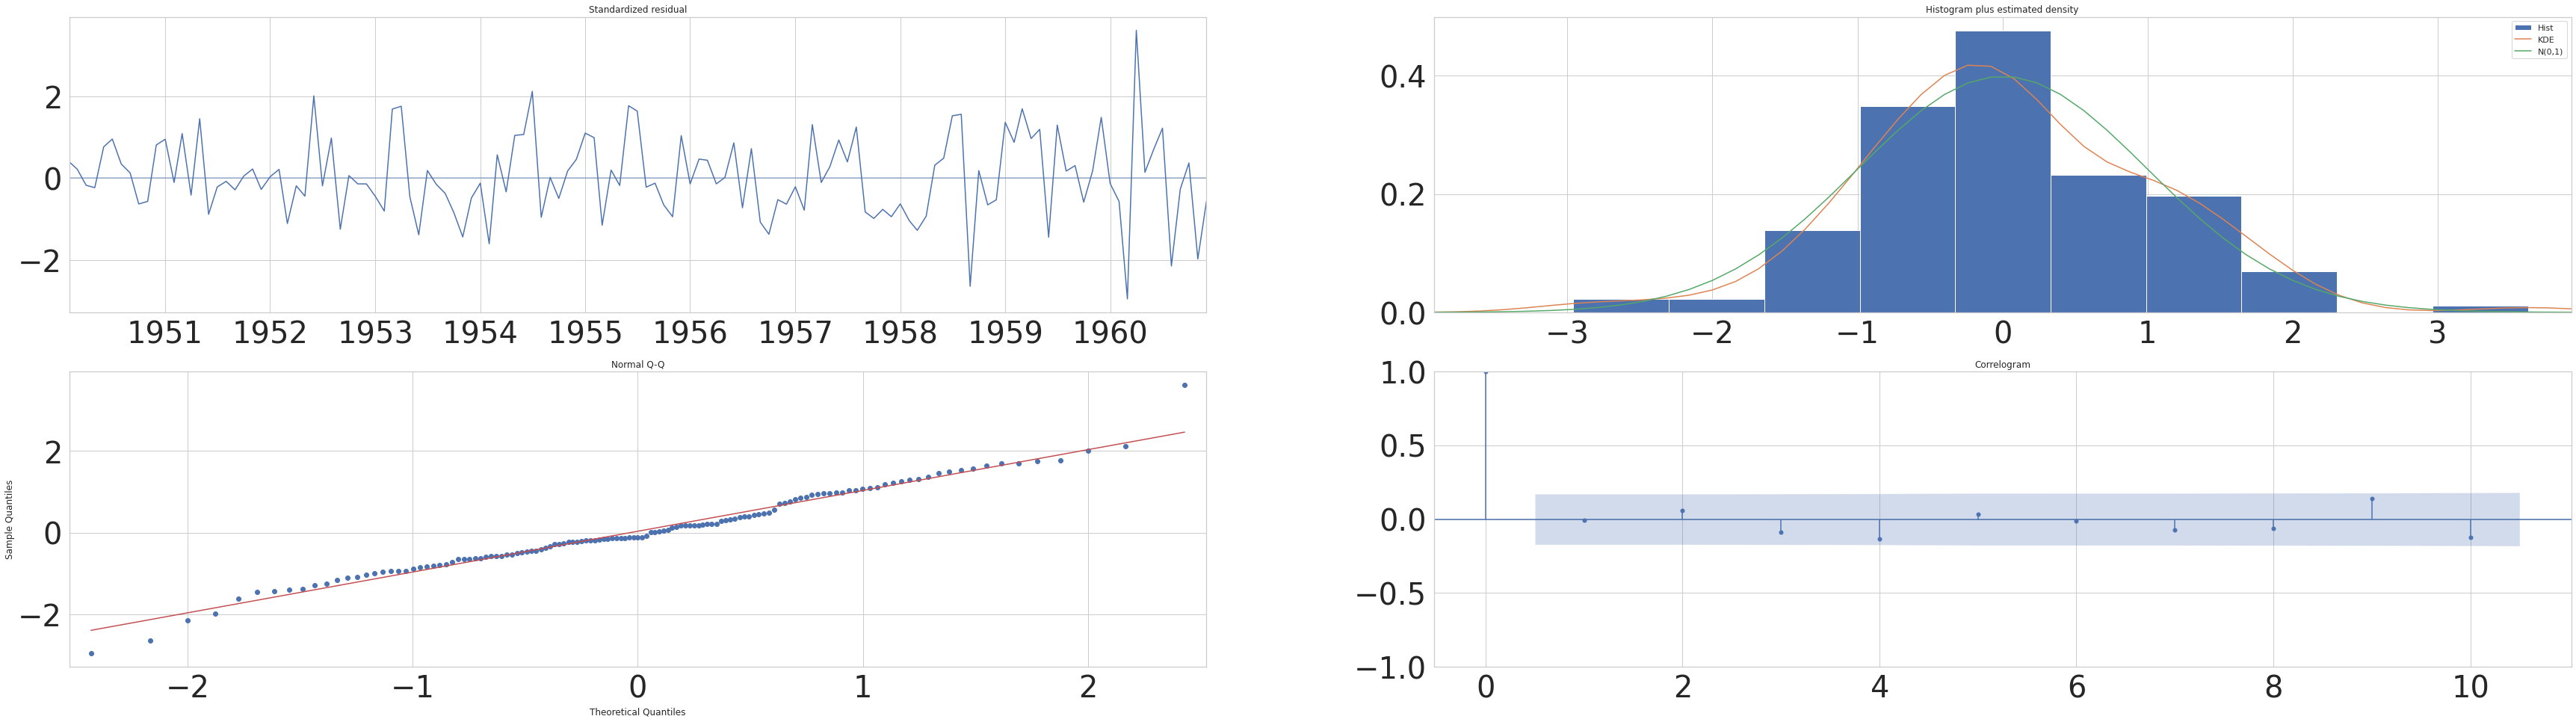

In [77]:
SARIMA_model.plot_diagnostics(figsize=(60,16))
plt.show()

# Lets Plot ACF and PACF: using seasonal_diff

Text(0.5, 1.0, ' Partial Autocorrelation Fuction')

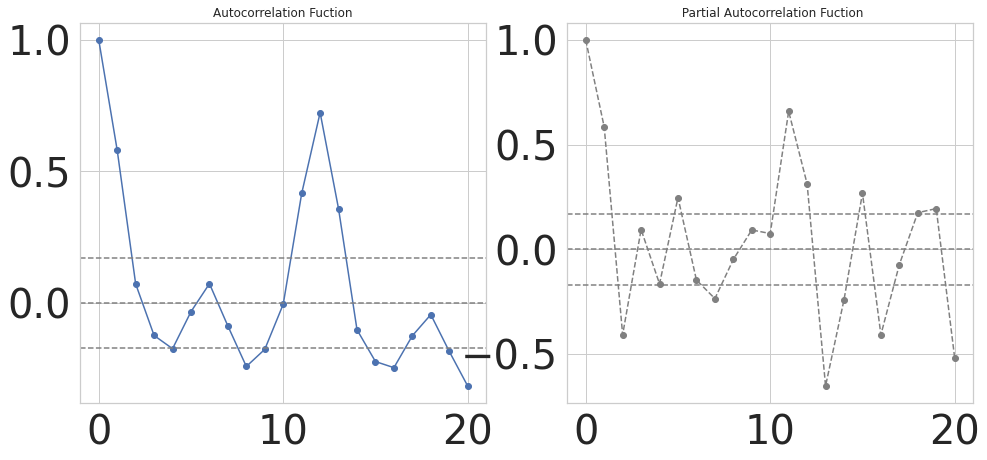

In [78]:
lag_acf =acf(seasonal_diff, nlags= 20)
lag_pacf =pacf(seasonal_diff,nlags=20)
plt.figure(figsize=(16,7))
# for ACF:
plt.subplot(121)
plt.plot(lag_acf,marker="o")
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.axhline(y =1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Fuction')

# For PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o",linestyle='--',color='gray')
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.axhline(y =1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.title(' Partial Autocorrelation Fuction')

79.765307543679


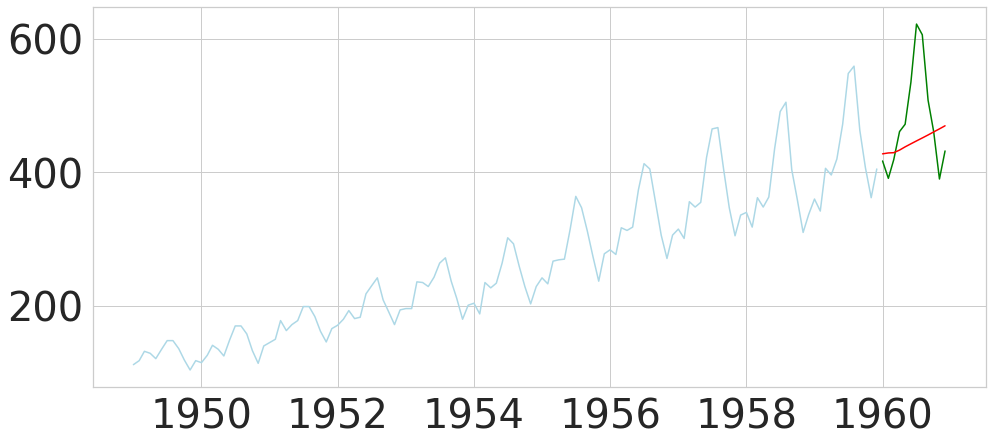

In [82]:
plt.figure(figsize=(16,7))
plt.plot(x_train.index,x_train.values, color="lightblue")
plt.plot(x_test.index,x_test.values,color='green')

pred= pd.DataFrame(result_ARIMA.forecast(len(x_test)))
pred.columns =["Passenger_Travel"]
pred.index= x_test.index

pred["Passenger_Travel"] =pred["Passenger_Travel"].apply(lambda x:math.exp(x)-1)

measure= math.sqrt(mean_squared_error(x_test.values, pred.values))
print(measure)
plt.plot(pred.index,pred.fillna(0).values,color='red')
plt.show()
